In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import diffimTests as dit

import warnings
warnings.filterwarnings('ignore')

Using flux=620 for SNR=5 (see cell #4 of notebook '30. 4a. other psf models-real PSFs')

In [2]:
n_runs = 1000
testResults1 = dit.multi.runMultiDiffimTests(varSourceFlux=620., n_runs=n_runs)
testResults2 = dit.multi.runMultiDiffimTests(varSourceFlux=620.*np.sqrt(2.), n_runs=n_runs, 
                                             templateNoNoise=False)
testResults3 = dit.multi.runMultiDiffimTests(varSourceFlux=620.*np.sqrt(2.), n_runs=n_runs, 
                                             templateNoNoise=False, skyLimited=False)

RUNNING: 1000
CORES: 3


[Parallel(n_jobs=None)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to z

[Parallel(n_jobs=None)]: Done 1000 out of 1000 | elapsed: 108.8min finished


RUNNING: 1000
CORES: 3


[Parallel(n_jobs=None)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s
[Parallel(n_jobs=None)]: Done 1000 out of 1000 | elapsed: 126.8min finished


RUNNING: 1000
CORES: 3


[Parallel(n_jobs=None)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s
[Parallel(n_jobs=None)]: Done 1000 out of 1000 | elapsed: 127.6min finished


In [3]:
dit.dumpObjects((testResults1, testResults2, testResults3), 'tmp_pkl')

In [4]:
testResults1, testResults2, testResults3 = dit.loadObjects('tmp_pkl')

FN: 
ALstack           29.129
ALstack_decorr    30.100
SZOGY             31.733
ZOGY              28.031
dtype: float64
FP: 
ALstack           4.859
ALstack_decorr    4.571
SZOGY             7.029
ZOGY              5.206
dtype: float64
TP: 
ALstack           20.871
ALstack_decorr    19.900
SZOGY             18.267
ZOGY              21.969
dtype: float64


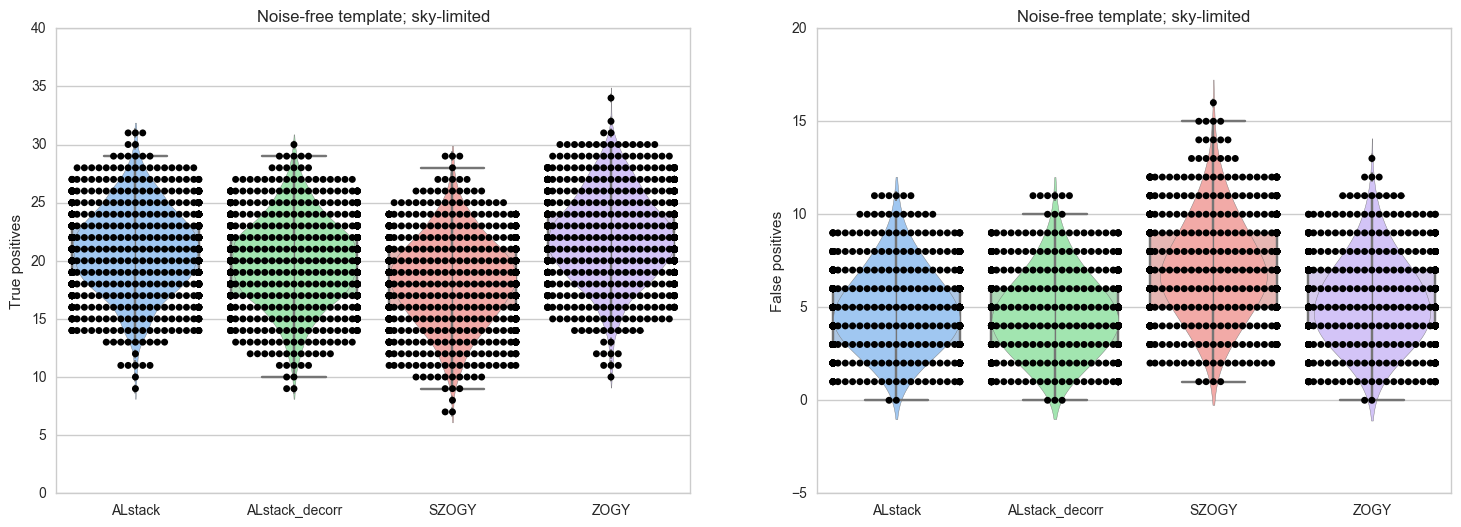

In [5]:
dit.multi.plotResults(testResults1, title='Noise-free template; sky-limited');

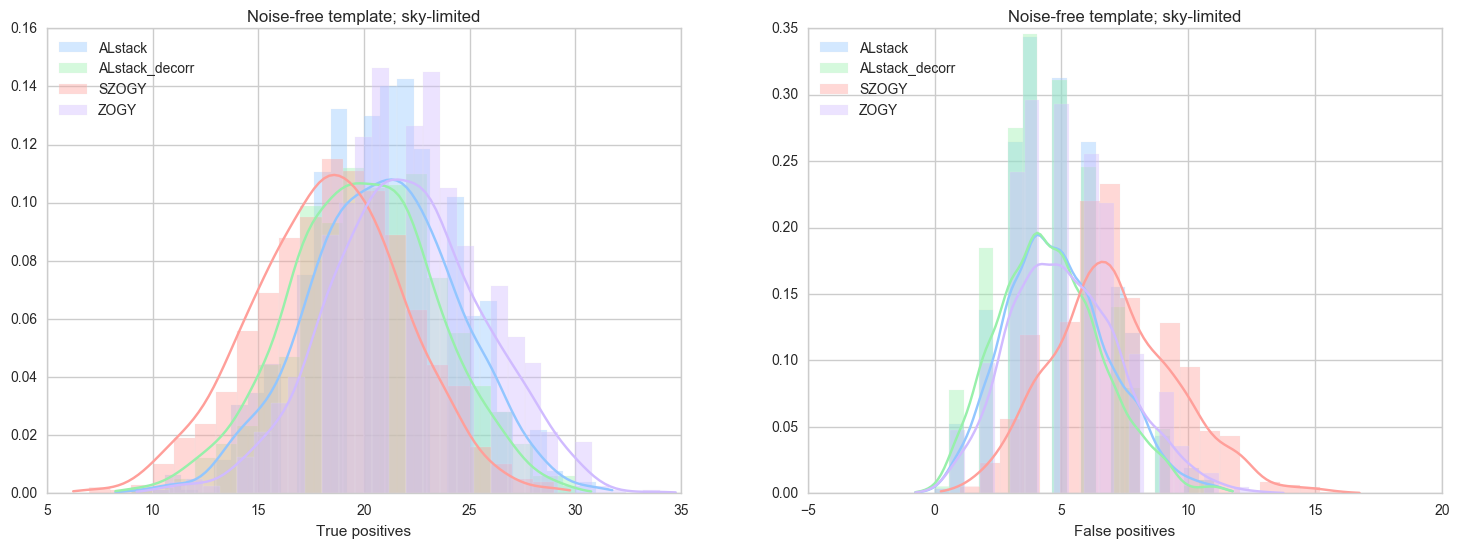

In [6]:
dit.multi.plotResults(testResults1, title='Noise-free template; sky-limited', asHist=True, doPrint=False);

Noise-free template; sky-limited :
AL:		5.08781629403 +/- 1.00598848223
AL(decorr):	5.07265063113 +/- 1.00165567746
ZOGY:		5.05205365022 +/- 1.00331552667


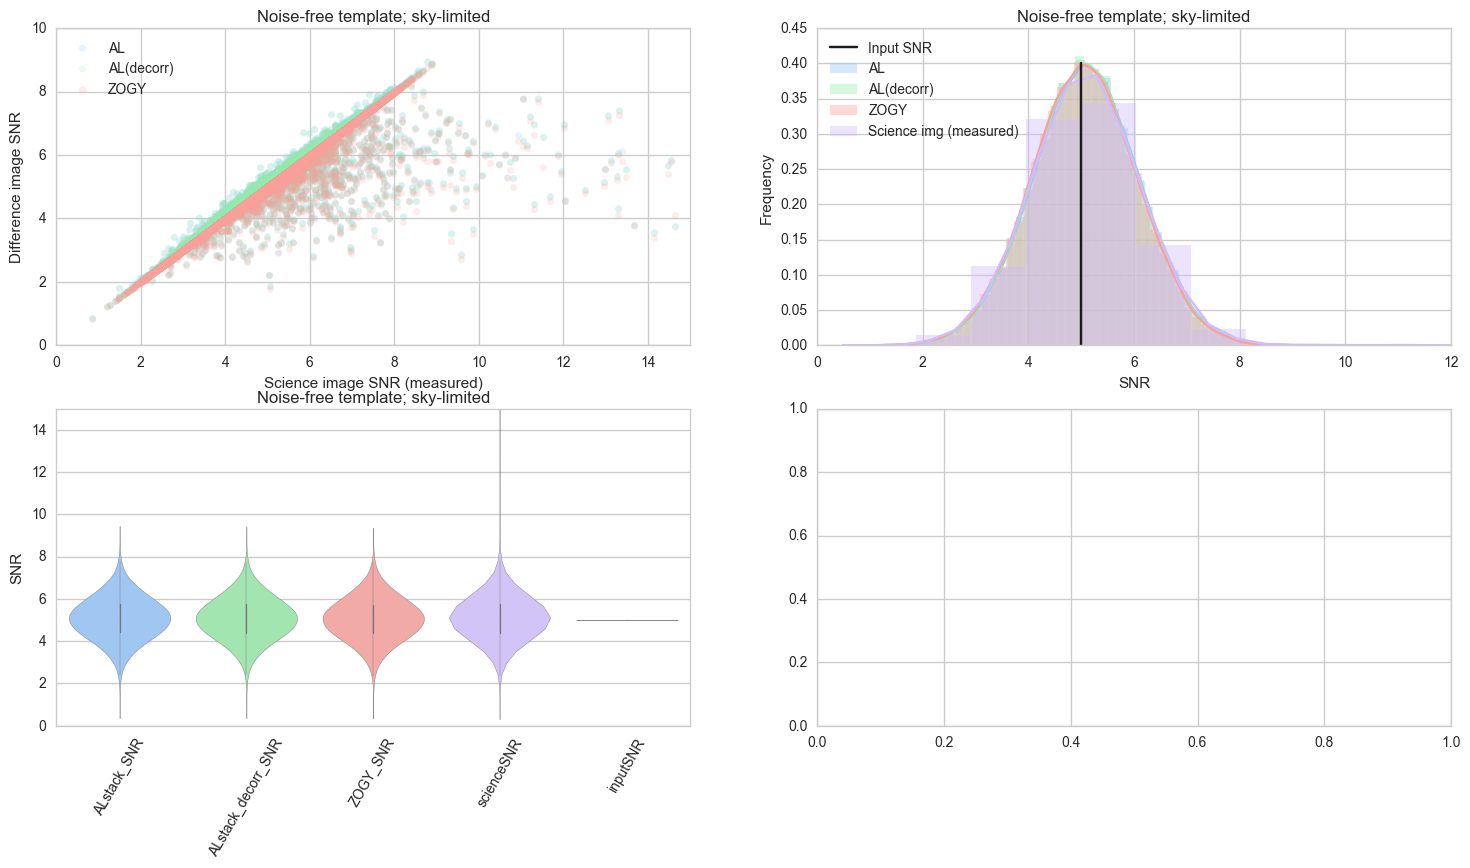

In [7]:
dit.multi.plotSnrResults(testResults1, title='Noise-free template; sky-limited');

FN: 
ALstack           20.148
ALstack_decorr    20.797
SZOGY             23.793
ZOGY              20.464
dtype: float64
FP: 
ALstack           4.712
ALstack_decorr    5.192
SZOGY             7.057
ZOGY              5.045
dtype: float64
TP: 
ALstack           29.852
ALstack_decorr    29.203
SZOGY             26.207
ZOGY              29.536
dtype: float64


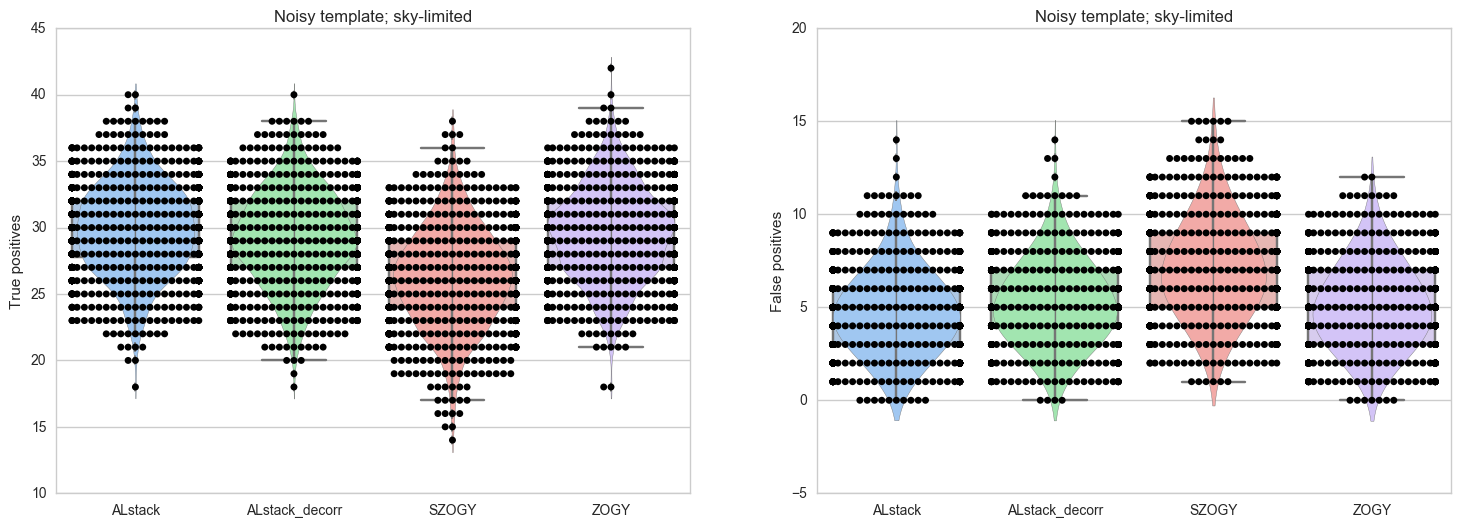

In [8]:
dit.multi.plotResults(testResults2, title='Noisy template; sky-limited');

Noisy template; sky-limited :
AL:		7.03514982653 +/- 1.28053430785
AL(decorr):	5.2453082303 +/- 0.949211306266
ZOGY:		5.4701889406 +/- 1.02470640426


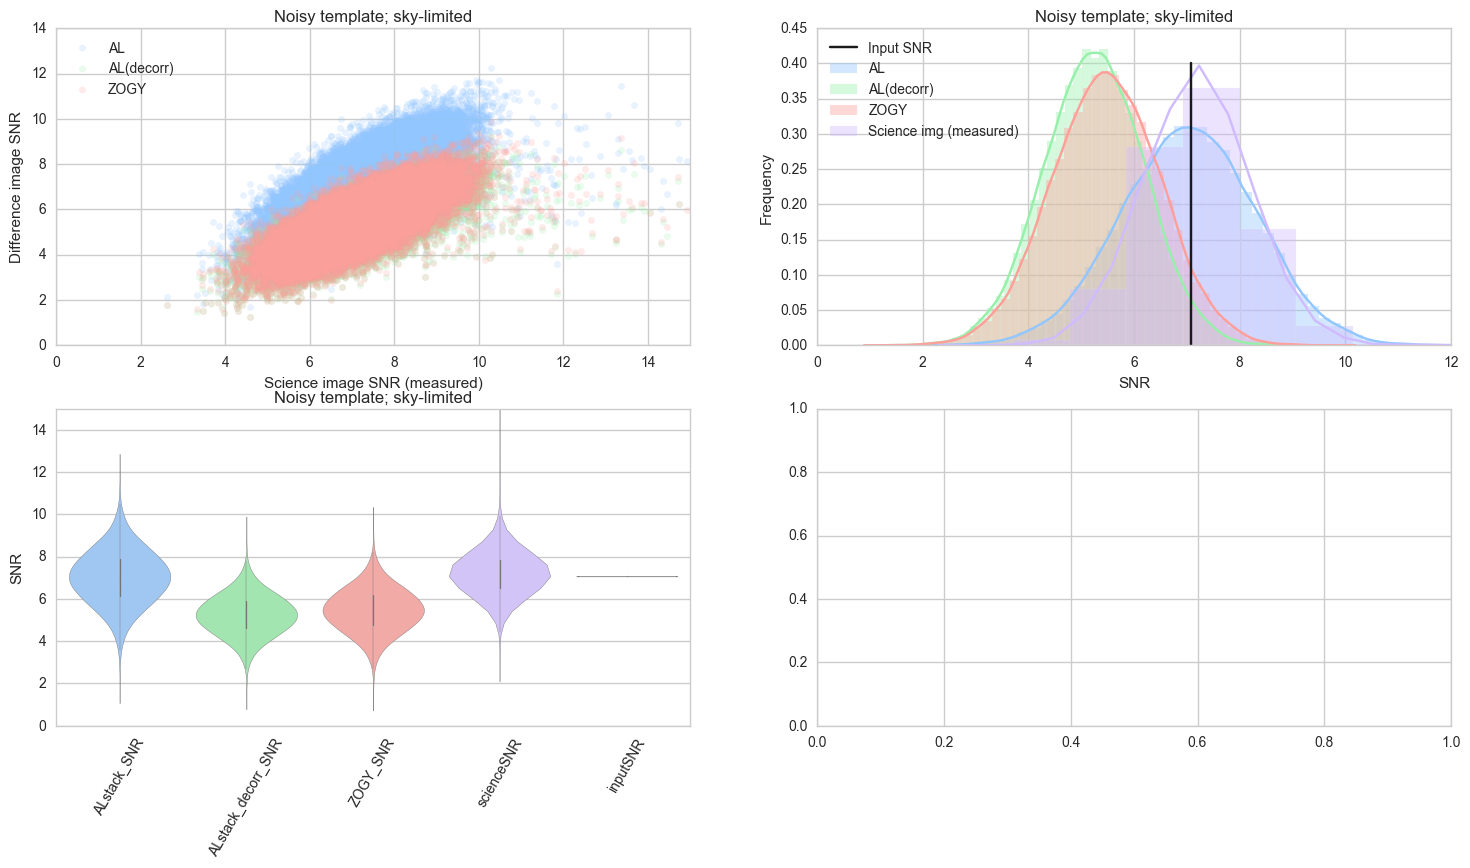

In [9]:
dit.multi.plotSnrResults(testResults2, title='Noisy template; sky-limited');

FN: 
ALstack           19.314
ALstack_decorr    19.896
SZOGY             25.729
ZOGY              20.475
dtype: float64
FP: 
ALstack           6.596
ALstack_decorr    7.384
SZOGY             6.860
ZOGY              5.057
dtype: float64
TP: 
ALstack           30.686
ALstack_decorr    30.104
SZOGY             24.271
ZOGY              29.525
dtype: float64


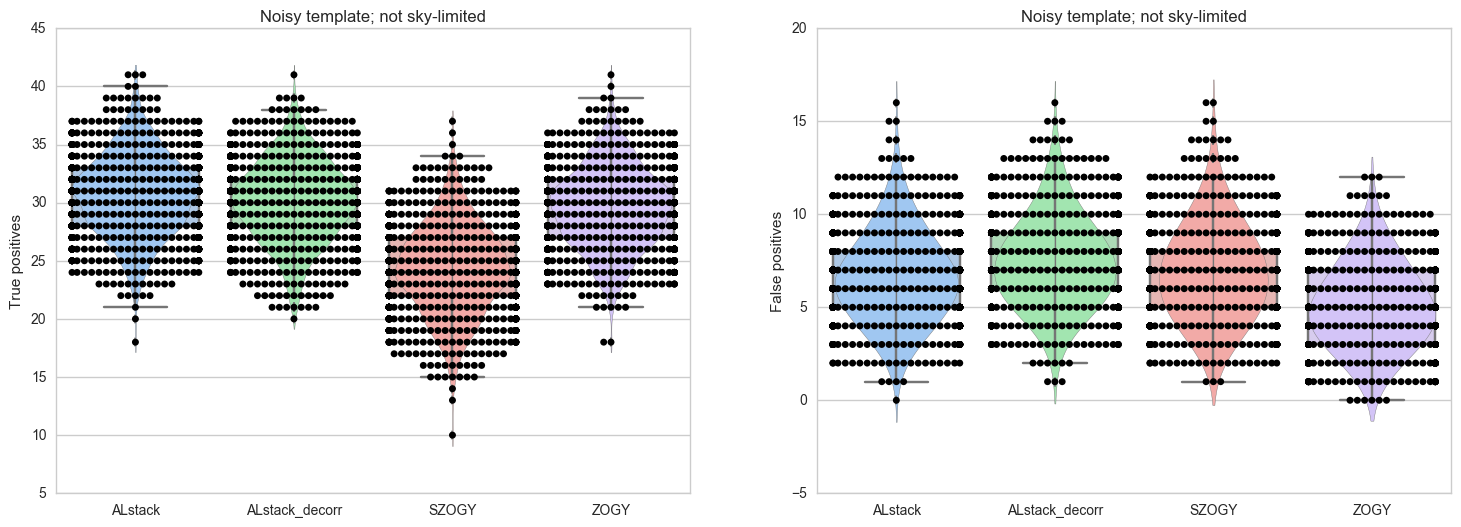

In [10]:
dit.multi.plotResults(testResults3, title='Noisy template; not sky-limited');

Noisy template; not sky-limited :
AL:		6.80112089843 +/- 1.22105994942
AL(decorr):	5.07932859825 +/- 0.906954948398
ZOGY:		5.36177834074 +/- 1.0034741528


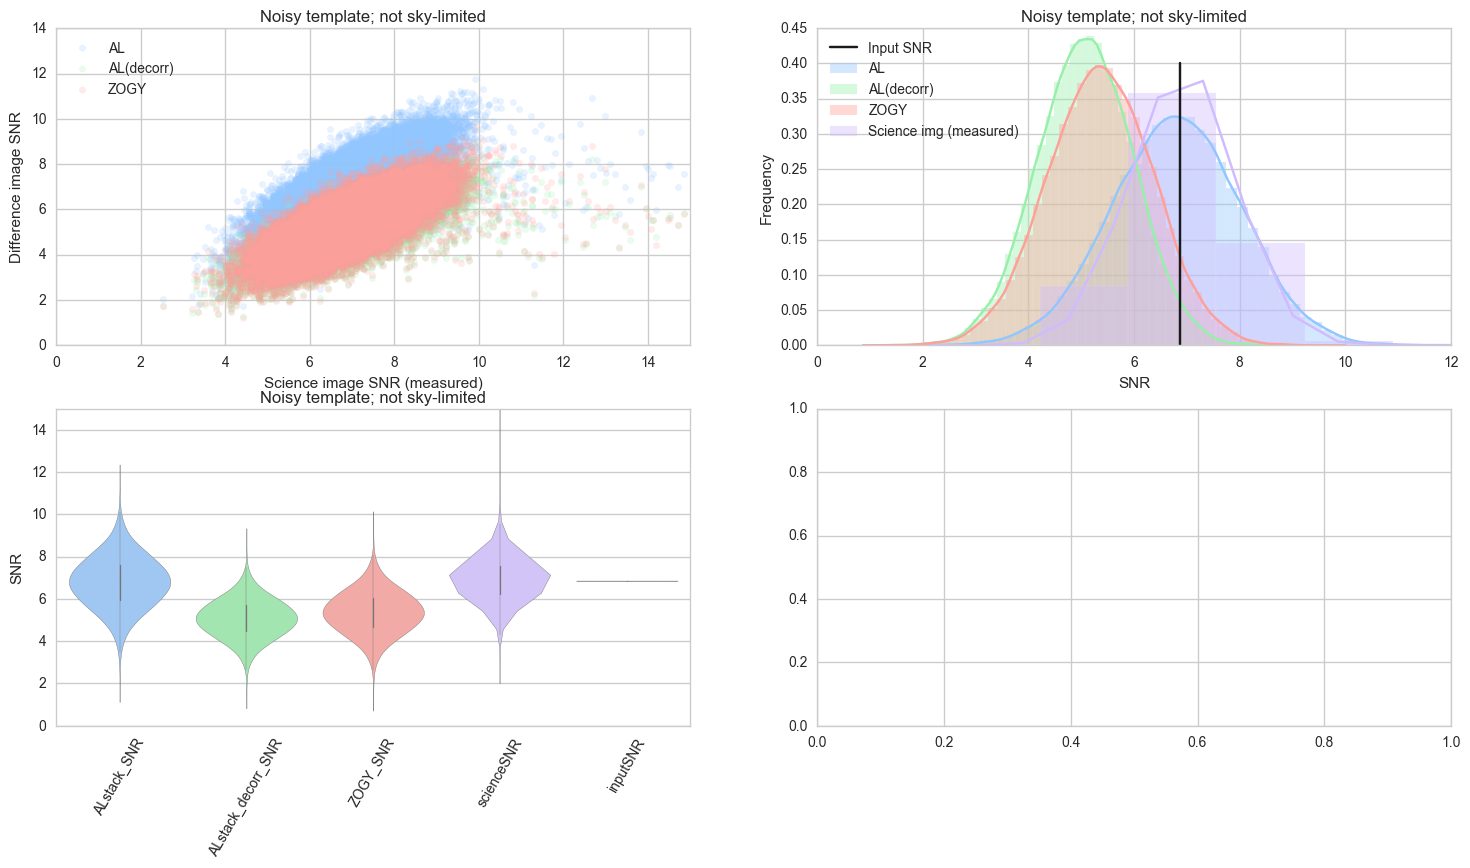

In [11]:
dit.multi.plotSnrResults(testResults3, title='Noisy template; not sky-limited');

#### Figure out what is up with the runs where `ZOGY` is performing poorly.

This goes away when we force it to use `zogyImageSpace=False`.

`ALstack` was performing poorly but this was fixed when recognizing that in `ALstack_decorr` PSF calculation, `tvar` and `svar` were mixed up.

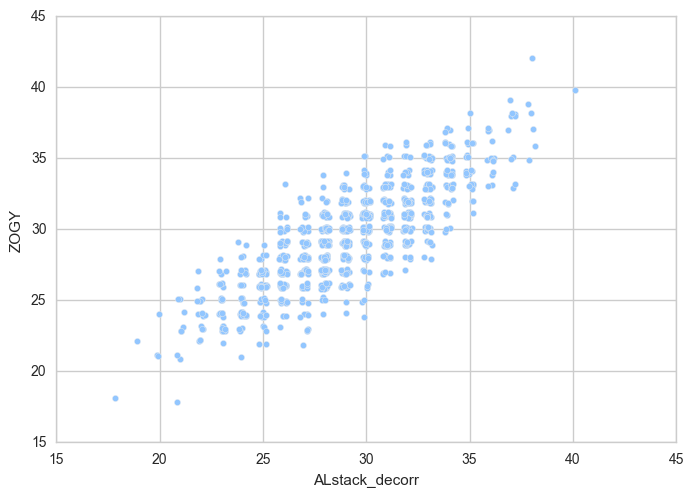

In [12]:
TP, FP, FN = dit.multi.plotResults(testResults2, actuallyPlot=False, doPrint=False)
TP.ALstack_decorr += np.random.uniform(-0.2, 0.2, TP.shape[0])
TP.ZOGY += np.random.uniform(-0.2, 0.2, TP.shape[0])
TP.plot.scatter('ALstack_decorr', 'ZOGY')

In [13]:
TP, FP, FN = dit.multi.plotResults(testResults2, actuallyPlot=False, doPrint=False)
print np.max(TP.ALstack_decorr/TP.ZOGY)
TP[TP.ALstack_decorr/TP.ZOGY > 1.6]

1.25


,ALstack,ALstack_decorr,SZOGY,ZOGY


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import diffimTests as dit

In [15]:
varSourceFlux = 620. * np.sqrt(2.)
n_runs = 100
inputs = [(f, seed) for f in [varSourceFlux] for seed in np.arange(66, 66+n_runs, 1)]
i = inputs[47]
res = dit.multi.runTest(flux=i[0], seed=i[1], templateNoNoise=False, returnObj=True)
print {key+': '+str(res['result'][key]) for key in ['ALstack', 'ZOGY', 'SZOGY', 'ALstack_decorr']}
testObj = res['obj']

set(["ALstack: {'FP': 1, 'FN': 18, 'TP': 32}", "SZOGY: {'FP': 4, 'FN': 21, 'TP': 29}", "ALstack_decorr: {'FP': 3, 'FN': 16, 'TP': 34}", "ZOGY: {'FP': 6, 'FN': 20, 'TP': 30}"])


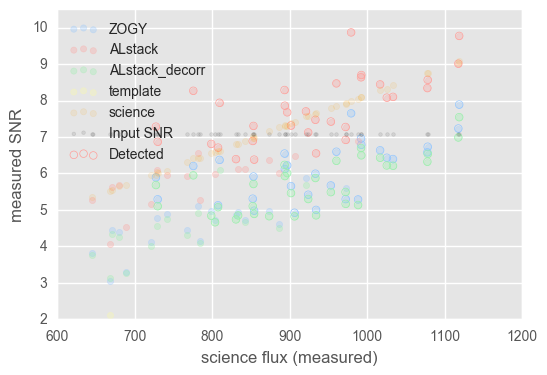

In [16]:
testObj.doPlotWithDetectionsHighlighted(transientsOnly=True, addPresub=True, xaxisIsScienceForcedPhot=True,
                                        skyLimited=True, alpha=0.3);
plt.xlim(600, 1200)
plt.ylim(2, 10.5);

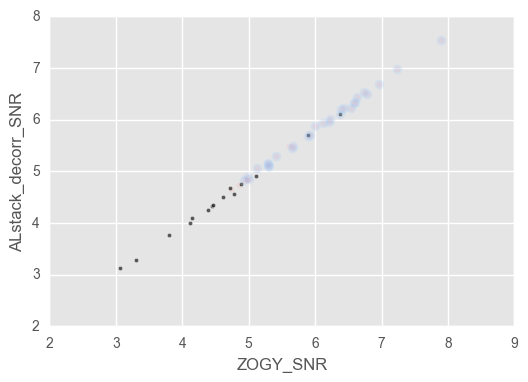

In [17]:
df = res['df']    
ax = df[df.ALstack_decorr_detected == True].plot.scatter('ZOGY_SNR', 'ALstack_decorr_SNR', c='r', alpha=0.2)
df[df.ALstack_decorr_detected == False].plot.scatter('ZOGY_SNR', 'ALstack_decorr_SNR', c='k', s=10, alpha=0.7, ax=ax)
df[df.ZOGY_detected == True].plot.scatter('ZOGY_SNR', 'ALstack_decorr_SNR', c='b', s=50, alpha=0.2, ax=ax)
#plt.xlim(3.5, 7.);
#plt.ylim(3.5, 7.);

In [18]:
tmp = df[(df.ZOGY_detected == False) & (df.ALstack_decorr_detected == True) & (df.ZOGY_SNR > 5.5)]
dit.sizeme(tmp)

,inputFlux,templateFlux,scienceFlux,inputId,inputCentroid_x,inputCentroid_y,inputSNR,ZOGY_SNR,ZOGY_flux,ZOGY_fluxSigma,...,ALstack_SNR,ALstack_flux,ALstack_fluxSigma,ALstack_detected,ALstack_decorr_SNR,ALstack_decorr_flux,ALstack_decorr_fluxSigma,ALstack_decorr_detected,templateSNR,scienceSNR
13,876.812409,131.395371,972.104601,14,347.918179,78.731185,7.069692,5.608846,906.535553,161.626032,...,7.274197,914.626123,125.735679,True,5.492636,886.857632,161.463038,True,1.323386,7.900479


A&L(dec): stats(mean=0.80444729, stdev=24.755363, min=-79.851479, max=112.66518)
ZOGY: stats(mean=0.13322131056175626, stdev=24.15857073989012, min=-123.89908776392306, max=120.45098317254497)
A&L(dec) - ZOGY: stats(mean=0.041901639679990228, stdev=2.2838656789376466, min=-13.618342023250932, max=29.286370365337941)
A&L(dec) - A&L: stats(mean=-0.032934006, stdev=6.7677746, min=-29.527901, max=33.501617)


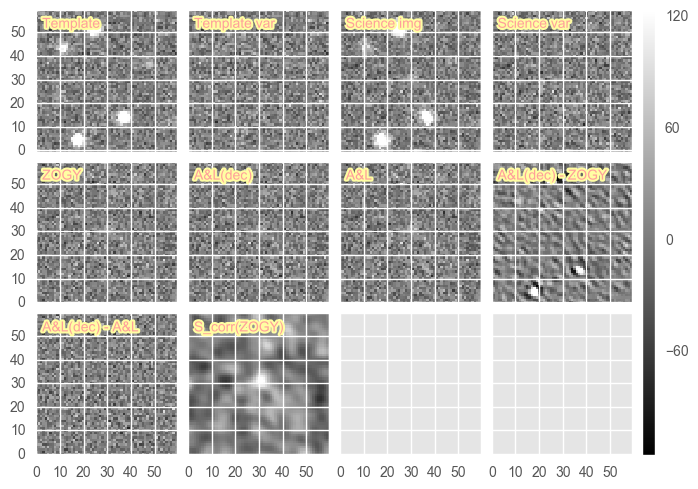

In [19]:
testObj.doPlot([tmp.inputCentroid_y.values[0], tmp.inputCentroid_x.values[0], 30], include_Szogy=True);

In [20]:
tmp = df[(df.ZOGY_detected == True) & (df.ALstack_decorr_detected == False)]
dit.sizeme(tmp)

,inputFlux,templateFlux,scienceFlux,inputId,inputCentroid_x,inputCentroid_y,inputSNR,ZOGY_SNR,ZOGY_flux,ZOGY_fluxSigma,...,ALstack_SNR,ALstack_flux,ALstack_fluxSigma,ALstack_detected,ALstack_decorr_SNR,ALstack_decorr_flux,ALstack_decorr_fluxSigma,ALstack_decorr_detected,templateSNR,scienceSNR
6,876.812409,-230.409477,979.314688,7,46.692518,250.312092,7.069692,7.648378,1220.103692,159.524494,...,9.866899,1235.770163,125.244029,True,NaN,NaN,NaN,False,-2.382474,7.986173
46,876.812409,-172.975408,809.501628,47,432.576003,314.758951,7.069692,6.372011,1016.556669,159.534673,...,7.937790,991.292100,124.882638,True,6.101977,978.40784,160.34275,False,-1.786529,6.622091


A&L(dec): stats(mean=0.65087146, stdev=24.049738, min=-71.942146, max=85.599762)
ZOGY: stats(mean=0.13322131056175626, stdev=24.15857073989012, min=-123.89908776392306, max=120.45098317254497)
A&L(dec) - ZOGY: stats(mean=0.01238734781610883, stdev=2.2551703335193531, min=-7.7809774885972978, max=8.095542072778148)
A&L(dec) - A&L: stats(mean=-0.032934006, stdev=6.7677746, min=-29.527901, max=33.501617)


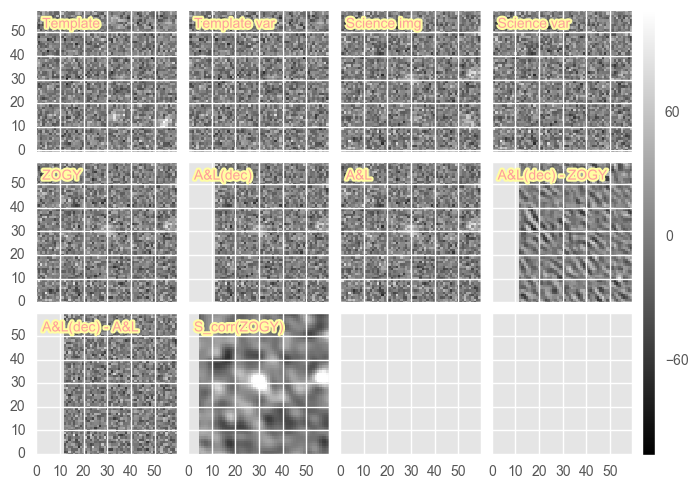

In [21]:
testObj.doPlot([tmp.inputCentroid_y.values[0], tmp.inputCentroid_x.values[0], 30], include_Szogy=True);

This is just to show boundary issues. I have updated the default in `makeFakeImages` to `avoidBorder=2.1` to avoid putting stars within 2.1x the (array) size of the PSF. This should handle all diffim cases for now.

A&L(dec): stats(mean=0.28101197, stdev=24.195913, min=-93.694748, max=86.293274)
ZOGY: stats(mean=0.13322131056175626, stdev=24.15857073989012, min=-123.89908776392306, max=120.45098317254497)
A&L(dec) - ZOGY: stats(mean=0.016169661639903923, stdev=2.2776769236537744, min=-8.3258537897310312, max=8.277986779837077)
A&L(dec) - A&L: stats(mean=-0.032934006, stdev=6.7677746, min=-29.527901, max=33.501617)


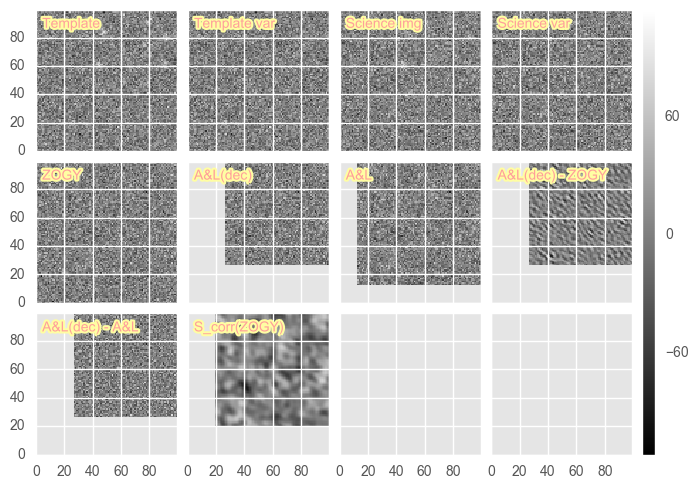

In [22]:
testObj.doPlot([51, 51, 50], include_Szogy=True);

Compare psfs...

(41, 41) (41, 41) (41, 41)
1.0 1.0 1.0
(-1.5563939026463879e-14, -1.7652546091539951e-14) (5.5927484865492363e-15, 4.9960036108132139e-15) (1.8648277366750692e-17, 1.1102230246251575e-16)
(ixx=3.57172475169, iyy=3.57172475169, ixy=-0.576532426934)
(ixx=3.44746143794, iyy=3.48146871511, ixy=-0.59886690357)
(ixx=4.03994623804, iyy=4.03994623804, ixy=-0.799989278877)
stats(mean=1.0324656693641882e-05, stdev=1.73051447515765e-05, min=-0.00049382887650318945, max=0.00081860027441812283)


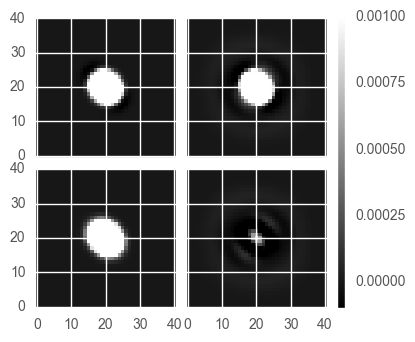

In [23]:
zPSF = testObj.D_ZOGY.psf
adPSF = dit.afw.afwPsfToArray(testObj.ALres.decorrelatedDiffim.getPsf())
aPSF = dit.afw.afwPsfToArray(testObj.ALres.subtractedExposure.getPsf())

print zPSF.shape, adPSF.shape, aPSF.shape
print zPSF.sum(), adPSF.sum(), aPSF.sum()
print dit.psf.computeMoments(zPSF), dit.psf.computeMoments(adPSF), dit.psf.computeMoments(aPSF)
print dit.afw.arrayToAfwPsf(zPSF).computeShape()
print dit.afw.arrayToAfwPsf(adPSF).computeShape()
print dit.afw.arrayToAfwPsf(aPSF).computeShape()

print dit.utils.computeClippedImageStats(adPSF - zPSF)

dit.plotImageGrid((zPSF, adPSF, aPSF, adPSF-zPSF), clim=(-0.0001, 0.001))

Now let's compare the variance planes... Well, let's look at the signal/variance planes.

In [24]:
zvar = testObj.D_ZOGY.var
advar = testObj.ALres.decorrelatedDiffim.getMaskedImage().getVariance().getArray()
avar = testObj.ALres.subtractedExposure.getMaskedImage().getVariance().getArray()

zim = testObj.D_ZOGY.im
adim = testObj.ALres.decorrelatedDiffim.getMaskedImage().getImage().getArray()
aim = testObj.ALres.subtractedExposure.getMaskedImage().getImage().getArray()

#print dit.computeClippedImageStats(testObj.D_ZOGY.var)
#print dit.computeClippedImageStats(testObj.im1.var)
#print dit.computeClippedImageStats(testObj.im2.var)

print dit.computeClippedImageStats(zim)
print dit.computeClippedImageStats(adim)
print dit.computeClippedImageStats(aim)
print
print dit.computeClippedImageStats(zvar)
print dit.computeClippedImageStats(advar)
print dit.computeClippedImageStats(avar)
print
print dit.computeClippedImageStats(zim/zvar)
print dit.computeClippedImageStats(adim/advar)
print dit.computeClippedImageStats(aim/avar)

stats(mean=0.13322131056175626, stdev=24.15857073989012, min=-123.89908776392306, max=120.45098317254497)
stats(mean=0.24922085, stdev=24.092674, min=-107.33761, max=124.72741)
stats(mean=0.22699688, stdev=17.497337, min=-78.826843, max=95.183472)

stats(mean=599.96957869360574, stdev=24.127808178613666, min=489.0, max=707.0)
stats(mean=604.40002, stdev=32.690571, min=456.60587, max=757.51556)
stats(mean=313.35715, stdev=17.020868, min=236.47679, max=393.03787)

stats(mean=-0.00052369231678811264, stdev=0.04034541066058342, min=-0.2281751155873353, max=0.18417581524853971)
stats(mean=-0.0011377595, stdev=0.039876338, min=-0.23507716, max=0.19429015)
stats(mean=-0.0014335904, stdev=0.055890728, min=-0.33333859, max=0.28591108)


Note that sqrt(300 * 2) = 24.49